# Datastory Trachea-, bronchiën- en longkanker



# 

In [11]:
# Import packages
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

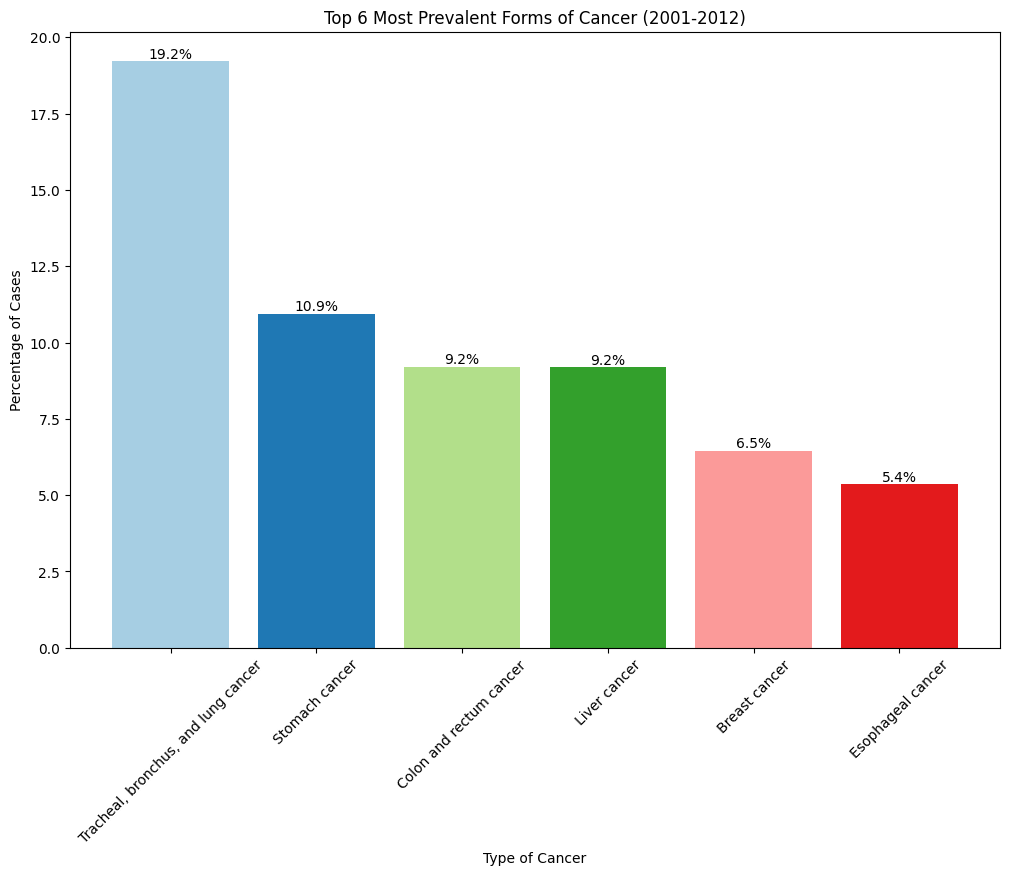

In [12]:
# Load the CSV file
file_path = 'csv/CancerDeaths.csv'
cancer_data = pd.read_csv(file_path)

# Trim any whitespace from the column names
cancer_data.columns = cancer_data.columns.str.strip()

# Filter data for the years 2001-2012
filtered_data = cancer_data[(cancer_data['Year'] >= 2001) & (cancer_data['Year'] <= 2012)]

# Select columns related to cancer types (exclude Country, Code, and Year columns)
cancer_types = cancer_data.columns[3:]

# Sum the cases for each type of cancer over the filtered years
cancer_sums = filtered_data[cancer_types].sum()

# Sort the sums in descending order to get the most prevalent forms of cancer
sorted_cancer_sums = cancer_sums.sort_values(ascending=False)

# Select the top 6 most prevalent forms of cancer
top_6_cancers = sorted_cancer_sums.head(6)

# Calculate the total number of cancer cases for percentage calculation
total_cancer_cases = cancer_sums.sum()

# Calculate the percentage for each of the top 6 cancers
top_6_percentages = (top_6_cancers / total_cancer_cases) * 100

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_6_cancers.index, top_6_percentages, color=plt.cm.Paired(range(6)))

# Adding percentages on top of the bars
for bar, percentage in zip(bars, top_6_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Type of Cancer')
plt.ylabel('Percentage of Cases')
plt.title('Top 6 Most Prevalent Forms of Cancer (2001-2012)')
plt.xticks(rotation=45)
plt.show()

# Perpectief 1: Roken als oorzaak van TBL-kanker

Het is algemeen bekend dat roken ongezond is, voornamelijk omdat roken kanker zou veroorzaken. Bij het roken van een sigaret wordt de rook via de luchtwegen in de longen geïnhaleerd. Omdat de rook dus in direct contact komt met de luchtwegen en longen wordt er vaak naar roken gewezen als hoofdoorzaak van TBL-kanker. Wij denken dat roken alleen niet de hoofdoorzaak van TBL-kanker hoeft te zijn.

## Rokers per capita 

Het aantal rokers per capita is een goede aanduiding voor het aantal TBL-Kanker patiënten. Dit plaatje laat zien dat de mensen in de Westerse landen het meeste roken, waarschijnlijk omdat zij daar het meeste geld hebben. De wereldkaart daaronder laat zien dat in deze regio's ook de meeste aantal kanker-doden per capita voorkomen. Dit duidt er dus wel op dat er in landen waar het meeste gerookt wordt, de meeste gevallen van TBL-Kanker voorkomen. 

In [13]:
# importeer merged_data
merged_data = pd.read_csv("csv/df/merged_smokers_df.csv")

# Create a choropleth map
fig = px.choropleth(
    merged_data,
    locations="Country",
    locationmode="country names",
    color="Smokers_Per_Capita",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Gemiddelde aantal rokers per Capita (2000-2012)"
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Rokers<br>Per Capita",
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    height=600,    
)
# Show the figure
fig.show()

df_lung_per_capita = pd.read_csv("csv/df/lung_per_capita.csv")

# Create the choropleth map for lung cancer rates
fig_lung = px.choropleth(df_lung_per_capita,
                         locations='Code',
                         color='Lung Cancer Per Capita',
                         hover_name='Country',
                         color_continuous_scale=px.colors.sequential.Plasma,
                         title='Lung Cancer Rates per Capita by Country')

# Update layout for a larger map
fig_lung.update_layout(
    title_text='TBL-Kanker Cijfers per Capita per Land',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    height=600,
    coloraxis_colorbar=dict(
        title="TBL-kanker<br>Per Capita",
    )
)
fig_lung.show()

## Rokers correlatie met TBL-Kanker

De plots hieronder laten zien dat het aantal rokers afneemt, maar dat het aantal TBL-kanker gevallen wel doorstijgt. Het lijkt hierdoor zelfs een negatieve correlatie te hebben. Dit geldt voor het aantal rokers, en het gemiddeld aantal sigaretten per capita. Dit duidt erop dat roken waarschijnlijk niet de enige oorzaak is van TBL-kanker, maar zoals hierboven te zien heeft het wel een heel groot aandeel.

In [14]:
# importeer grouped smokers data
df_grouped = pd.read_csv("csv/df/grouped_smokers_df.csv")

# Create the scatter plot with trendline using plotly
correlation_coefficient_smoke = df_grouped['LungCancerPerCapita'].corr(df_grouped['SmokersPerCapita'])
fig = px.scatter(df_grouped, x="LungCancerPerCapita", y="SmokersPerCapita", trendline="ols",
                 title='Correlatie tussen LBT-kanker en Rokers per Capita',
                 hover_data=["Year"],
                 labels={
                     "SmokersPerCapita": "Totale Rokers per Capita",
                     "LungCancerPerCapita": "LBT-Kanker Doden per Capita",
                     "Year":"Jaar"
                 })

# Add correlation coefficient as annotation
fig.add_annotation(
    x=max(df_grouped['LungCancerPerCapita']),  # Position the annotation at the far right of the x-axis
    y=min(df_grouped['SmokersPerCapita']),  # Position the annotation at the bottom of the y-axis
    text=f'Correlation Coefficient: {correlation_coefficient_smoke:.2f}',
    showarrow=False,
    font=dict(size=12, color="black"),
    xanchor='right',
    yanchor='bottom'
)

fig.update_layout(
    height = 600
)
fig.show()

# Create the scatter plot with trendline using plotly
correlation_coefficient_smoke = df_grouped['LungCancerPerCapita'].corr(df_grouped['CigarettesPerCapita'])
fig2 = px.scatter(df_grouped, x="LungCancerPerCapita", y="CigarettesPerCapita", trendline="ols",
                 title='Correlatie tussen LBT-Kanker en Sigaretten per Dag per Capita',
                 hover_data=["Year"],
                 labels={
                     "CigarettesPerCapita": "Totale Sigaretten per dag per Capita",
                     "LungCancerPerCapita": "LBT-Kanker Doden per Capita",
                     "Year":"Jaar"
                 })

# Add correlation coefficient as annotation
fig2.add_annotation(
    x=max(df_grouped['LungCancerPerCapita']),  # Position the annotation at the far right of the x-axis
    y=min(df_grouped['CigarettesPerCapita']),  # Position the annotation at the bottom of the y-axis
    text=f'Correlation Coefficient: {correlation_coefficient_smoke:.2f}',
    showarrow=False,
    font=dict(size=12, color="black"),
    xanchor='right',
    yanchor='bottom'
)

fig2.update_layout(
    height = 600
)

fig2.show()



Het zou dus kunnen wijzen op andere oorzaken voor TBL-kanker. Sigaretten bevatten vele kankerverwekkende stoffen. In de rook van sigaretten zitten meer dan 60 verschillende carcinogenen, waaronder in kleine aantallen een van de sterkste carcinogeen groepen, polycyclic aromatic hydrocarbons (PAH). PAH’s zijn producten van onvolledige verbranding en komen ook voor in uitlaatgassen van onder andere auto’s (Hecht, 2006). Uit de literatuur volgt dus ook dat roken wel zou kunnen leiden tot TBL-kanker. Maar het is onwaarschijnlijk dat dit de hoofdoorzaak is.

# Perspectief 2: Fijnstof

TBL-kanker heeft meerdere oorzaken dan alleen roken, anders zouden alleen rokers TBL-kanker krijgen. Een mogelijke oorzaak van TBL-kanker kan daarom niet slechts het roken zelf zijn, maar wellicht bepaalde stoffen in de sigarettenrook. Deze stoffen komen niet alleen vrij bij het roken, maar bij de onvolledige verbranding van stoffen in het algemeen, denk bijvoorbeeld aan auto-uitlaatgassen. Uitstoot in de lucht komt ook in direct contact met de longen en luchtwegen bij het ademen. 



In [15]:
# importeer gecleande dataframes 
year_lung_cancer = pd.read_csv("csv/df/cancer_cleaned_data.csv")
year_total_emissions = pd.read_csv("csv/df/emissions_cleaned_data.csv")

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Tracheale, bronchus- en longkanker per jaar', 'Totale Emissies Per Jaar Wereldwijd'))

# Add the lung cancer data trace to the first subplot
fig.add_trace(go.Scatter(x=year_lung_cancer['Year'], y=year_lung_cancer["Tracheal, bronchus, and lung cancer "],
                         mode='lines', name='Tracheale, bronchus- en longkanker'),
              row=1, col=1)

# Add the total emissions data trace to the second subplot
fig.add_trace(go.Scatter(x=year_total_emissions['Year'], y=year_total_emissions['Total'],
                         mode='lines', name='Totale Emissies'),
              row=1, col=2)

# Update the layout for the entire figure
fig.update_layout(
    title_text='Vergelijking van Tracheale, bronchus- en longkanker en Totale Emissies per jaar',
    showlegend=False
)

# Update x-axis and y-axis titles for each subplot
fig.update_xaxes(title_text='Jaar', row=1, col=1)
fig.update_yaxes(title_text='Tracheale, bronchus- en longkanker', row=1, col=1)
fig.update_xaxes(title_text='Jaar', row=1, col=2)
fig.update_yaxes(title_text='Totale Emissies', row=1, col=2)

# Show the plot
fig.show()

## Wereld visualisatie

Er zijn ook erg veel culturele verschillen op het gebied van longkanker, op deze wereldkaarten valt te zien welke gebieden in de wereld het meeste te maken hebben met longkanker en luchtvervuiling.

In [16]:
# importeer gecleande datasets

df_lung_per_capita = pd.read_csv("csv/df/lung_per_capita.csv")
df_emissions_per_capita = pd.read_csv("csv/df/emissions_per_capita.csv")

# Create the choropleth map for lung cancer rates
fig_lung = px.choropleth(df_lung_per_capita,
                         locations='Code',
                         color='Lung Cancer Per Capita',
                         hover_name='Country',
                         color_continuous_scale=px.colors.sequential.Plasma,
                         title='Lung Cancer Rates per Capita by Country')

# Update layout for a larger map
fig_lung.update_layout(
    title_text='TBL-Kanker Cijfers per Capita per Land',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    height=600,
    coloraxis_colorbar=dict(
        title="TBL-kanker<br>Per Capita",
    )
)

# Create the choropleth map for emissions
fig_emissions = px.choropleth(df_emissions_per_capita,
                              locations='Code',
                              color='Emissions Per Capita',
                              hover_name='Country',
                              color_continuous_scale=px.colors.sequential.Plasma,
                              title='Emissions per Capita by Country'
                              )

# Update layout for a larger map
fig_emissions.update_layout(
    title_text='Emissies per Capita per Land',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    height=600,
    coloraxis_colorbar=dict(
        title="Emissies<br>Per Capita",
    )
)

# Show the figures
fig_lung.show()
fig_emissions.show()

## India en Amerika

In de grafiek hieronder zijn twee duidelijke grafieken gemaakt, hierin is heel duidelijk te zien dat het aantal longkanker gevallen flink stijgt als de emissies per capita ook omhoog gaan.

In [18]:
# importeer dataframe
df_combined = pd.read_csv("csv/df/combined_usa_india.csv")

def plot_country_data(df, countries):
    # Create figure with secondary y-axes and two columns
    fig = make_subplots(rows=1, cols=2, specs=[[{"secondary_y": True}, {"secondary_y": True}]],
                        subplot_titles=(countries[0], countries[1]))

    for i, country in enumerate(countries):
        df_country = df[df['Country'] == country]
        # Add traces for Lung Cancer Per Capita
        fig.add_trace(
            go.Scatter(x=df_country['Year'], y=df_country['Lung Cancer Per Capita'], name=f"TBL-Kanker Per Capita - {country}"),
            row=1, col=i+1, secondary_y=False,
        )

        # Add traces for Emissions Per Capita
        fig.add_trace(
            go.Scatter(x=df_country['Year'], y=df_country['Emissions Per Capita'], name=f"Emissies Per Capita - {country}"),
            row=1, col=i+1, secondary_y=True,
        )

        # Set y-axes titles for each subplot
        fig.update_yaxes(title_text="<b>TBL-Kanker Per Capita", row=1, col=i+1, secondary_y=False)
        fig.update_yaxes(title_text="<b>Emissies Per Capita", row=1, col=i+1, secondary_y=True)

    # Update x-axis title and figure title
    fig.update_xaxes(title_text="Jaar", row=1, col=1)
    fig.update_xaxes(title_text="Jaar", row=1, col=2)
    fig.update_layout(
        title_text="Dubbele aslijnen voor USA en India",
        height=600
    )

    fig.show()

# Plot for USA and India
plot_country_data(df_combined, ['USA', 'India'])

## Correlatie plots

Hieronder staat een aantal plots dat correlaties laat zien tussen verschillende variabelen uit onze datasets.

In [19]:
# importeer grouped df
df_grouped = pd.read_csv("csv/df/grouped_df.csv")

# Create the scatter plot with trendline using plotly
correlation_coefficient = df_grouped['EmissionsPerCapita'].corr(df_grouped['LungCancerPerCapita'])
fig = px.scatter(df_grouped, x="EmissionsPerCapita", y="LungCancerPerCapita", trendline="ols",
                 title='Correlatie tussen LBT-kanker en Emissies per Capita (MtCO2 per persoon)',
                 hover_data=["Year"],
                 labels={
                     "EmissionsPerCapita": "Totale Emissies per Capita (MtCO2 per persoon)",
                     "LungCancerPerCapita": "LBT-Kanker Doden per Capita",
                     "Year":"Jaar"
                 })

# Add correlation coefficient as annotation
fig.add_annotation(
    x=max(df_grouped['EmissionsPerCapita']),  # Position the annotation at the far right of the x-axis
    y=min(df_grouped['LungCancerPerCapita']),  # Position the annotation at the bottom of the y-axis
    text=f'Correlation Coefficient: {correlation_coefficient:.2f}',
    showarrow=False,
    font=dict(size=12, color="black"),
    xanchor='right',
    yanchor='bottom'
)

fig.update_layout(
    height = 600
)

Luchtvervuiling en met name fijnstof, wat veroorzaakt wordt door onvolledige verbranding van fossiele brandstoffen (Cohen & Pope, 1995), is een grote veroorzaker van onder andere longkanker. In 2016 was met 19 procent van alle kanker-gerelateerde overlijdens TBL-kanker (Trachea, bronchiën en longkanker) de grootste doodsoorzaak onder alle kankersoorten (Safiri et al., 2021).

# Referenties 

> Cohen, A. J., & Pope 3rd, C. A. (1995). Lung cancer and air pollution. _Environmental health perspectives, 103_(suppl 8), 219-224.
>
> Safiri, S., Sohrabi, M. R., Carson-Chahhoud, K., Bettampadi, D., Taghizadieh, A., Almasi-Hashiani, A., ... & Kolahi, A. A. (2021). Burden of tracheal, bronchus, and lung cancer and its attributable risk factors in 204 countries and territories, 1990 to 2019. _Journal of Thoracic Oncology, 16_(6), 945-959.
